**Tutorials I have used for this notebook**

https://blog.oursky.com/2018/02/14/tensorflow-business-applications-ai-hong-kong/ - THIS IS REALLY USEFUL
https://www.youtube.com/watch?v=19LQRx78QVU&list=PLgNJO2hghbmiXg5d4X8DURJP9yv9pgjIu&index=1
https://www.youtube.com/watch?v=jztwpsIzEGc

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib #Remember - ! || % at the beginning

ERROR: Invalid requirement: '#Remember'
'%' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!pip list

Package                       Version
----------------------------- --------------------
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.1.4
anaconda-project              0.10.2
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
bea

In [3]:
import tensorflow as tf
import os

In [4]:
tf.config.list_physical_devices(device_type=None)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
#When you execute a typical tensorflow application it usually uses all your GPUs VRAM, typically causing something known as an Out of Memory error or OOM. This line of code sets the gpus memory consumption growth.
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    #Keeps memory kept to a minimum
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
import cv2 #checkout open cv
import imghdr #allows to check file extensions for images
from matplotlib import pyplot as plt

In [7]:
data_dir = 'data' #variable which points to out image folder

In [8]:
os.listdir(data_dir) #returns the image folders we are going to use

['happy', 'sad']

In [9]:
os.listdir(os.path.join(data_dir, 'happy')) #Can return the contents of a folder using the following

['05-12-21-happy-people.jpg',
 '07-120104-happy_people_are_not_nice_people.jpg',
 '1-2.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '11-Habits-of-Truly-Happy-People.jpg',
 '154006829.jpg',
 '170404-happy-workers-feature.jpg',
 '1902539.jpg',
 '1902540.jpg',
 '1902587.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '227-2271622_happy-people-business-team-celebrating-png.png',
 '7-Habits-of-Happy-People-image.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg',
 '8cxKy5g9i.jpg',
 '960x0.jpg',
 'A_Sep20_14_1189155141.jpg',
 'bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg',
 'blog_image_20180219221810890.jpg',
 'brady-bunch-3.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 'fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg',
 'friends-happy-190821-800x450.jpg',
 'GettyImages-565706549-949x534.jpg',
 'GettyImages-871518740-1024x707.jpg',
 'ge

In [10]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

We can identify image extensions using 'image_exts[0]' etc etc.. to identify in the above array

In [11]:
image_exts[1]

'jpg'

Anything under 10kb reccommended removing

In [12]:
img =cv2.imread(os.path.join('data', 'happy', '1902540.jpg')) #Outputs the image as a numpy array, this code can be used on its own however I am going to store it in a variable 'img' to be able to output it

In [13]:
img.shape #for shape dimensions (804 pixels high - first one represents how high, second represents how many wide and it uses 3 channels which means it's a colour image)

(804, 1280, 3)

Below we can see our image and the dimensions given

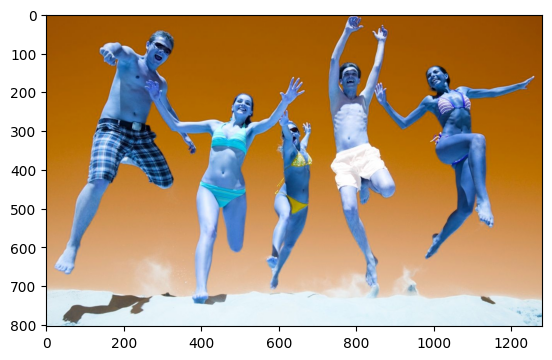

In [14]:
plt.imshow(img)

You might notice however that the colours don't look right, this is because OpenCV reads in an image as BCR and matplotlib expects it to be RGB in order to fix this we need:

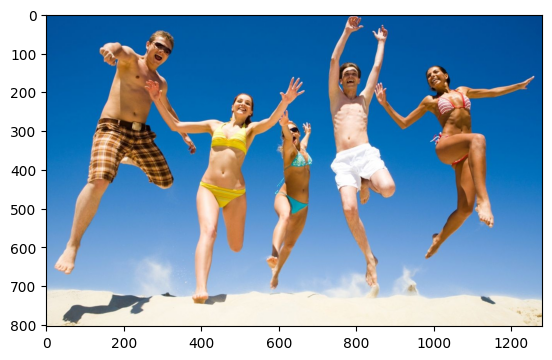

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #Parsing the image and the colour conversion code which will re-order the channels

To hide the text above the image use plt.show() - like so

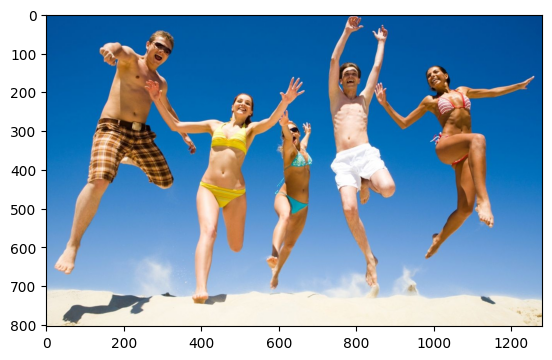

In [16]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [17]:
for image_class in os.listdir(data_dir): #goes through directory and prints each image class
    for image in os.listdir(os.path.join(data_dir, image_class)): #prints every single image in sub directory
        image_path = os.path.join(data_dir, image_class, image)
        try:
            image = cv2.imread(image_path) #checks to ensure the image loads with opencv
            tip = imghdr.what(image_path) #checks to see the image matches the correct path
            if tip not in image_exts:
                print ('Image not in ext list{}'.format(image_path))
                os.remove(image_path) #if it doesn not exist in the correct path, this code will remove the image
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            #os.remove(image_path)

Next we need to load our data in, to do this luckily TensorFlow has it's own dataset api.

So why use it? Well it actually allows you to build data pipelines so instead of loading everything into memory to begin with it actually allows you to build a data pipline

Why would you want to build a data pipeline?

1. It allows you to scale out to much larger datasets
2. Gives you a repeatable set of steps that you're going to apply to your data
3. It also just makes things a lot cleaner

If you want to access more information about the API use:

In [ ]:
tf.data.Dataset??

In Juypiter '??' gives you documentation for that sort of code

In [19]:
import numpy as np

In [20]:
tf.keras.utils.image_dataset_from_directory?? #You can view how much it'll resize your images, here for example it'll go 256x256 in batch size 32, super useful helper for image classificiation

SyntaxError: invalid syntax (3159690962.py, line 1)

Keras actually has a data pipeline function built into it too

This code below will build an image dataset on the fly so you don't need to build labels or classes and it also does a bunch of pre-processing so it'll resize our images too

In [21]:
data = tf.keras.utils.image_dataset_from_directory('data') #Builds the data pipeline

Found 171 files belonging to 2 classes.


If you want to change values of batch size or any other value, just pass the argument along with data and its new value

In [22]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

We can't use data[1] because it's not preloaded into memory, it's actually a generator so on the fly we need to actually go and grab the data that we want. The easiest way to do this is to convert it into a numpy iterator first like so (after next paragraph)

We then need to set our dataset into a folder or variable called data, as a result we can now take a look at the data itself

In [23]:
data_iterator = data.as_numpy_iterator() #allows us to access the data pipeline

In [24]:
data_iterator

In [25]:
#Get another batch from the iterator
batch = data_iterator.next() #This is going to get us a batch back - also accessing the data pipeline itself

In [ ]:
batch #we can also view our data

In [27]:
len(batch)

2

In [28]:
#images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [29]:
batch[1] #one represents happy or sad

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0])

So how do we identify if 1 is assigned to happy or 0 assigned to sad?

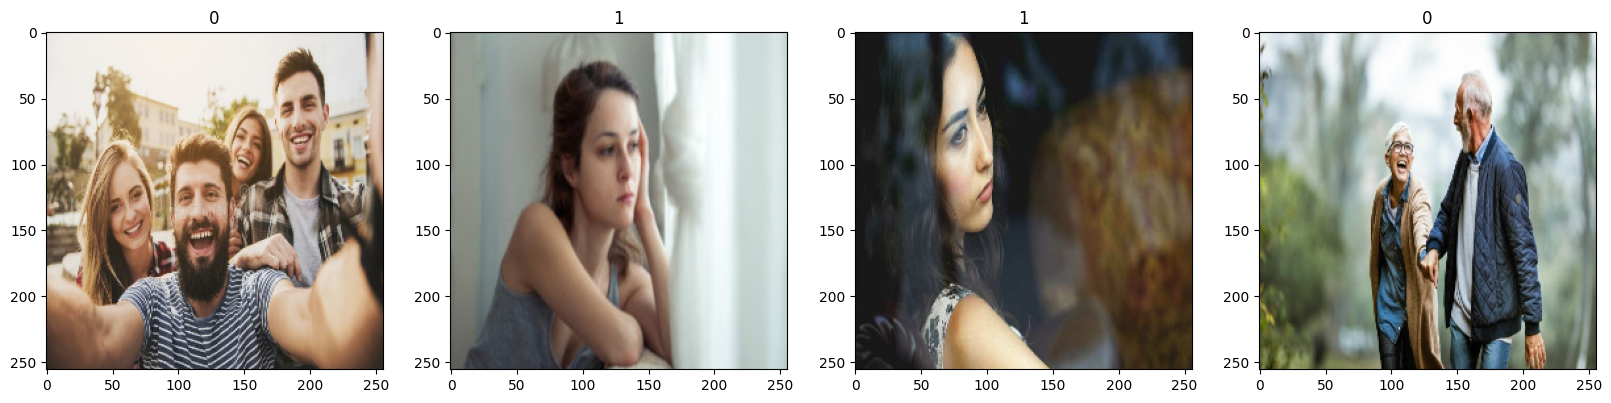

In [30]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20)) #Here we are using matplot lib and its subplots function to output 4 coloums of the images in the size defined at the particular time
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

From here we can identify that:

In [31]:
#class 1 = sad people
#class 0 = happy people
batch[0]

array([[[[231.      , 228.      , 223.      ],
         [232.      , 229.      , 224.      ],
         [233.16968 , 230.16968 , 225.16968 ],
         ...,
         [221.      , 214.      , 208.      ],
         [219.1875  , 210.1875  , 203.1875  ],
         [217.      , 206.125   , 200.0625  ]],

        [[231.0393  , 228.0393  , 223.0393  ],
         [232.69849 , 229.69849 , 224.69849 ],
         [233.3125  , 230.3125  , 225.3125  ],
         ...,
         [221.      , 214.      , 208.      ],
         [219.1875  , 210.1875  , 203.1875  ],
         [217.      , 206.125   , 200.0625  ]],

        [[232.04468 , 229.04468 , 224.04468 ],
         [233.13403 , 230.13403 , 225.13403 ],
         [234.3125  , 231.3125  , 226.3125  ],
         ...,
         [221.      , 214.      , 208.      ],
         [219.1875  , 210.1875  , 203.1875  ],
         [217.      , 206.125   , 200.0625  ]],

        ...,

        [[ 44.795166,  41.670166,  35.267334],
         [ 47.      ,  42.134033,  35.731934]

Next we need to pre-process our data

Remember batch[0] is labels and batch [1] is images

In [32]:
batch[0].shape

(32, 256, 256, 3)

First represents how many images, next 2 are size then third is colour channels

The original size of the images will most likely be 0 - 255, we can check this with

In [33]:
batch[0].min()

0.0

In [34]:
batch[0].max()

255.0

Ideally when building deep learning models you want the values to be as small as possible which helps massively with optimization

If we divide the values by 255 though we'll get our values between 0 and 1

We can also represent this in a variable to display the new change

In [35]:
scaled = batch[0] / 255

In [36]:
scaled.min()

0.0

In [37]:
scaled.max()

1.0

Our data is now scaled but in this case we are using a data pipeline so we can't do this for every batch, for efficiency using the data pipeline capability there's another method

In [38]:
data = data.map(lambda x,y: (x/255, y))

map allows us to process our data as it's being recieved down the pipeline, this also applies when we are pre-fetching data which speeds up how quickly we can access data from our disk

.map allows us to perform the transformation in pipeline, lambda function allows us to do that transformation

x will represent our images and y will be our target variable or basically represent our labels 

tf.data api allows us to view more functions (tf.data.dataset) - (Google)

Other common functions are zip, skip, from_tensors (look at the docs)

In [39]:
data.as_numpy_iterator().next() #This is no different from our previous code loading in the batch - batch = data_iterator.next()

(array([[[[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [9.97203410e-01, 9.97203410e-01, 9.97203410e-01],
          [9.93446529e-01, 9.93446529e-01, 9.93446529e-01],
          [9.28130746e-01, 9.28130746e-01, 9.28130746e-01]],
 
         [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [9.93198514e-01, 9.93198514e-01, 9.93198514e-01],
          [9.36510026e-01, 9.36510026e-01, 9.36510026e-01],
          [9.93997037e-01, 9.93997037e-01, 9.93997037e-01]],
 
         [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [9.49309707e-01, 9.49309707e-01, 9.4930

Our numbers of batches

In [40]:
len(data)

6

allocating batches to training, validation and testing

In [41]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [42]:
train_size+val_size+test_size

6

In [43]:
train = data.take(train_size) #Saying how many batches we want to allocate to our training data - data needs to be shuffled before we do this
val = data.skip(train_size).take(val_size) #Skipping the batches because theyve already been allocated then take the last 2 into our val data
test = data.skip(train_size+val_size).take(test_size) #Everything left over

Amount of batches each variable above is using

In [44]:
len(train)

3

In [45]:
len(val)

2

In [46]:
len(test)

1

Building the deep learning model using the Keras sequential API

In [55]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [56]:
model = Sequential()

Here we're going to add in our layers

In [ ]:
MaxPooling2D??

In [57]:
#3 Convolution blocks
#The first section is adding a convolutional layer and a max pooling layer
#When passing the first layer, the first layer needs to have an input / be an input layer
#First number (16) represents 16 filters and our filter is going to be 3 pixels by 3 pixels in size and we are going to have a stride of 1, this means its going to move 1 pixel each time, all values can be altered, these are known as architectural decisions
#We are applying a relu activation one of many which takes the output of the convolutional layer (Represented by conv2d) and pass it through a function that looks like a line graph it means any output below 0 converts to 0 but keeps its other positive values which allows us to take into account non linear patterns
#sigmoid activation is also another type of activation.

#after the first line max pooling is activated which takes the maximum value after the relu activation and its going to return back that value IE: condencess the information

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
#Flatten layer
model.add(Flatten())
#2 dense layers which are fully connected layers (256 neurons and final layer is single dense layer which represents 0 or 1 because its a sigmoid activation)
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

We then need to complile it

'adam' is the name of an optimizer

In [ ]:
tf.optimizers. #-To view all optimizers

SyntaxError: invalid syntax (15961465.py, line 1)

Our loss in this case because we are performing a binary classification problem will result in crossentropy

And finally the metrics we want to track are accuracy which will tell us how well the model is doing by classifying it as 0 or 1

In [58]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

You can then view how the model changes our data with:

It becomes 127 because it's shaped 2,2 it's taking 254 and dividing it by 2 which is 127.0

MaxPooling halfs data

The flattening takes the outputs from the last max pooling layer and converting it into a single dimension

Number of outputs passed to our flatten layer (below)

Condensing them down into a single dimension, instead of having a multi-dimension or multi-ranked tensor, we're converting it down to 1 value

Then we pass to dense layer which is 256 neurons

And then we finally go down to a single layer

The weights from your neurons plus the bias term results in the final parameters

In [ ]:
30*30*16

14400

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 60, 16)        4624      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 14400)            

Next we'll move onto training the model

First specifying our logs folder

In [60]:
logdir ='logs'

Then we're going to create what's known as a callback which are useful for saving your model at a paticular checkpoint or if you wanted to do some specific logging

In [61]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

Here's where we fit our model, theres 2 really important methods when it comes to building a NN model.fit and model.predict.
Fit is the training component, predict is when we go and make predictions

Fit firstly takes in our training data through 'train' which was 4 batches of 32 images each. Epochs is how long we're going to train for. One epoch is one run over our entire training set of data. We're also going to pass through our validation data which means that after we've gone and performed on all our training data and training batches, we are then going to run evalutation on our validation data so we can actually see how well our model is performing in real time. Then we are also going to pass through our callbacks so if we wanted to go and apply additional callbacks. Basically, as we are passing tensorboard_callback defined above through callbacks, we are allowing it to logout and be opened inside tensorboard later on

In [62]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 7s 2s/step - loss: 0.8097 - accuracy: 0.5521 - val_loss: 0.6311 - val_accuracy: 0.6719
Epoch 2/20
3/3 [==============================] - 6s 2s/step - loss: 0.6046 - accuracy: 0.6458 - val_loss: 0.5819 - val_accuracy: 0.6094
Epoch 3/20
3/3 [==============================] - 5s 2s/step - loss: 0.5643 - accuracy: 0.5938 - val_loss: 0.5314 - val_accuracy: 0.7188
Epoch 4/20
3/3 [==============================] - 5s 2s/step - loss: 0.5080 - accuracy: 0.7500 - val_loss: 0.4555 - val_accuracy: 0.8906
Epoch 5/20
3/3 [==============================] - 5s 2s/step - loss: 0.4719 - accuracy: 0.8750 - val_loss: 0.5221 - val_accuracy: 0.6875
Epoch 6/20
3/3 [==============================] - 5s 2s/step - loss: 0.4322 - accuracy: 0.8021 - val_loss: 0.3983 - val_accuracy: 0.8594
Epoch 7/20
3/3 [==============================] - 5s 2s/step - loss: 0.4055 - accuracy: 0.8125 - val_loss: 0.3292 - val_accuracy: 0.8750
Epoch 8/20
3/3 [=========================

In [ ]:
hist.history

Next we need to plot our performance

This uses matplotlib

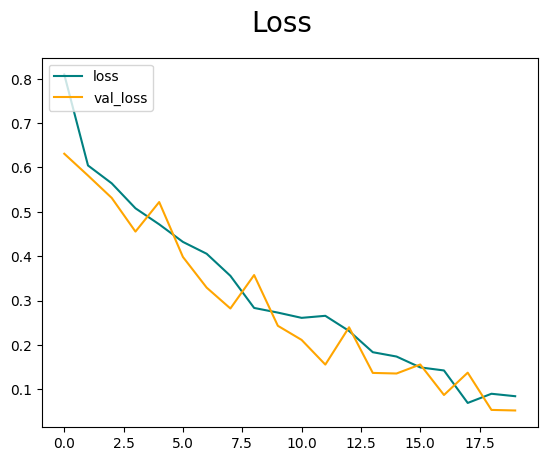

In [64]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss') #Grabbing our training data as defined above
plt.plot(hist.history['val_loss'], color='orange', label='val_loss') #Grabbing our validation loss
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Side note: If loss goes down and validation loss starts to rise, that's a sign that your model might be overfitting which means it might be time to apply some regularization, might also mean that we need to apply some data or change some data

Next we need to plot accuracy metrics

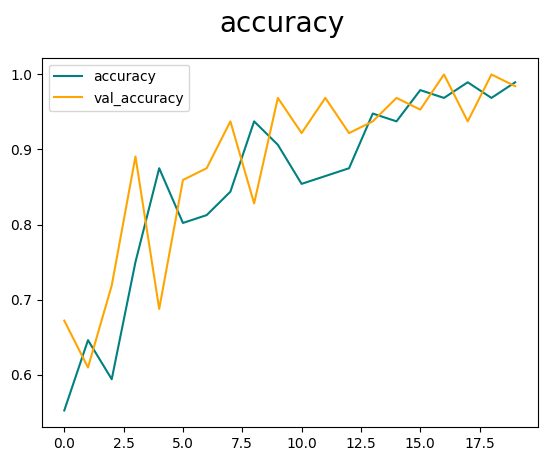

In [65]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy') #Grabbing our training data as defined above
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy') #Grabbing our validation loss
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Ideally this would need more data

The model is now trained!

Next and finally is the evaluation stage, this will help us evaluate the performance of the model we've built

The metrics that need to be measured for image classification are precision, recall and accuracy

First we need to import some metrics

In [66]:
from tensorflow.python.keras.metrics import Precision, Recall, BinaryAccuracy

In order to use these we need to establish instances of them

In [67]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [68]:
len(test) #We can measure our batch data with

1

In [69]:
#Basically the program is looping through each batch in our testing data and unpacks it
for batch in test.as_numpy_iterator():
    X, y = batch #X is our set of images and Y is effectively our true value
    yhat = model.predict(X) #Then we are passing through our image data to our model so model.predict is how we make predictions which will return a set of values between 0 and 1 because it has been passed through a sigmoid activation
    pre.update_state(y, yhat) #In order to update our metrics, we can use the update_state method, so precision.update_state(y - passing through our true value and our predicted value)
    re.update_state(y, yhat) #The same has been applied for recall and accuracy in these two lines of code
    acc.update_state(y, yhat)

Then we need to print out the results

In [70]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


A nicer way of writing this would be:

In [71]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


Each of these metrics are calculated between 0 and 1

1.0 = 100%

Next we're going to test some more data to see if our precision is correct

In [72]:
import cv2

By doing this we are going to read in an image our model has never seen before

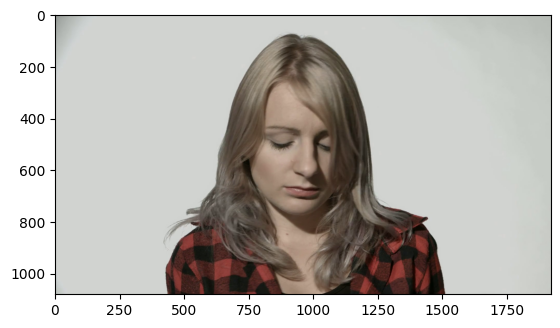

In [97]:
img = cv2.imread('sadtest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

Now we need to resize our image so our neural network can recognise it, so it needs to be in the shape 256x256x3

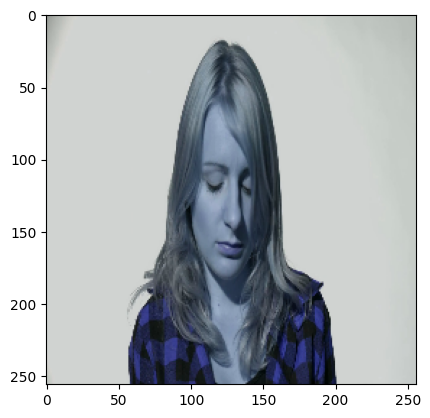

In [98]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

Then to test it, we can pass the image through to our model

As you can see from our first value it doesn't have an extra set of parentesis

In [99]:
resize.shape

TensorShape([256, 256, 3])

In [100]:
resize

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[146.     , 150.     , 145.     ],
        [148.35938, 152.35938, 147.35938],
        [153.15234, 157.15234, 152.15234],
        ...,
        [181.60938, 186.60938, 184.60938],
        [182.     , 187.     , 185.     ],
        [182.     , 187.     , 185.     ]],

       [[146.     , 150.     , 145.     ],
        [150.75   , 154.75   , 149.75   ],
        [155.82812, 159.82812, 154.82812],
        ...,
        [182.82812, 188.82812, 183.82812],
        [182.     , 188.     , 183.     ],
        [182.     , 188.     , 183.     ]],

       [[147.29688, 151.29688, 146.29688],
        [152.5    , 156.5    , 151.5    ],
        [156.25   , 160.25   , 155.25   ],
        ...,
        [183.     , 189.     , 184.     ],
        [183.     , 189.     , 184.     ],
        [182.     , 188.     , 183.     ]],

       ...,

       [[191.     , 195.     , 190.     ],
        [195.5    , 199.5    , 194.5    ],
        [198.01172, 202.011

All this is doing is putting it inside another set of arrays or putting it inside of another list

In [101]:
np.expand_dims(resize, 0).shape #This is a very common practice

(1, 256, 256, 3)

In [102]:
yhat = model.predict(np.expand_dims(resize/255, 0)) #Our neural network is expecting this to be in a batch instead of a single image, so how we can navigate this to encapsulate our image in another set of parentheses or arrays or put it inside of a list, we are also dividing it by 255 to scale it

In [103]:
yhat

array([[0.68127626]], dtype=float32)

Remember because our scale from sad(1) and happy(0) it has predicted a result of 0.18 and has identified it as happy

Basically, 50% is our cut off point, if it's below 50 we round it down to 0 but in this case it's happy, so in this case it's predicted correctly

You can extrapolate this using:

In [104]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


Finally, we need to save the model so we can reload it at a future date, or be deployed as an API or to an edge device

In [105]:
from tensorflow.python.keras.models import load_model

This saves the model into our models folder. Because it saves as a h5 model, what we're actually doing is something called serialization, so we're taking our model and we're serializing it onto something that we can store as a disk so this is similar to what you might do when you zip a data set. h5 is a serilalization file format. So we can save it, then reload it using the load model function above

In [106]:
model.save(os.path.join('models', 'happysadmodel.h5'))

Then we want to reload the model using:

In [107]:
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))

In [108]:
new_model

Then we can pass data to it using:

In [111]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

In [112]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


And that's it!